In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df_personality=pd.read_csv("/content/sample_data/personality_dataset.csv")
df_personality.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [3]:
df=df_personality

In [4]:
df["Stage_fear"]=df["Stage_fear"].map({"No":0,"Yes":1})

In [5]:
df["Drained_after_socializing"]=df["Drained_after_socializing"].map({"No":0,"Yes":1})

In [6]:
df["Personality"]=df["Personality"].map({"Extrovert":1,"Introvert":0})

In [7]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1
5,1.0,0.0,7.0,5.0,0.0,6.0,6.0,1
6,4.0,0.0,9.0,NaN,0.0,7.0,7.0,1
7,2.0,0.0,8.0,4.0,0.0,7.0,8.0,1
8,10.0,1.0,1.0,3.0,1.0,0.0,3.0,0
9,0.0,0.0,8.0,6.0,0.0,13.0,8.0,1


In [8]:
df.tail(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2895,3.0,0.0,7.0,6.0,0.0,6.0,6.0,1
2896,3.0,0.0,8.0,3.0,0.0,14.0,9.0,1
2897,4.0,1.0,1.0,1.0,1.0,4.0,0.0,0
2898,11.0,1.0,1.0,NaN,1.0,2.0,0.0,0
2899,3.0,0.0,6.0,6.0,0.0,6.0,9.0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   float64
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   float64
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 181.4 KB


In [10]:
# in above data, it is clear that there are null values in dataset, so we have to remove them

In [11]:
df=df.dropna()

In [12]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0,1
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0,0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0,0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0,1
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   float64
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   float64
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 174.2 KB


In [14]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,0.498991,3.939039,3.013726,0.498991,6.239806,3.559548,0.514332
std,3.491162,0.500100,2.900044,2.257239,0.500100,4.311365,2.927397,0.499895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,1.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


In [15]:
cols=["Time_spent_Alone","Stage_fear","Social_event_attendance","Going_outside","Drained_after_socializing","Friends_circle_size","Post_frequency","Personality"]

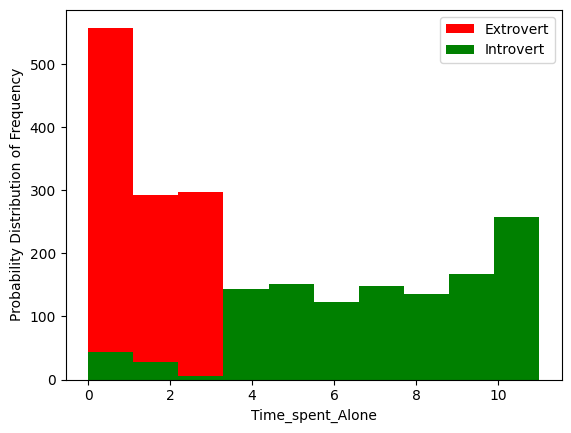

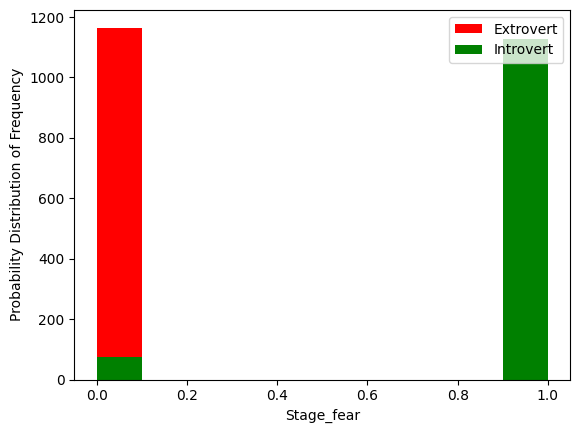

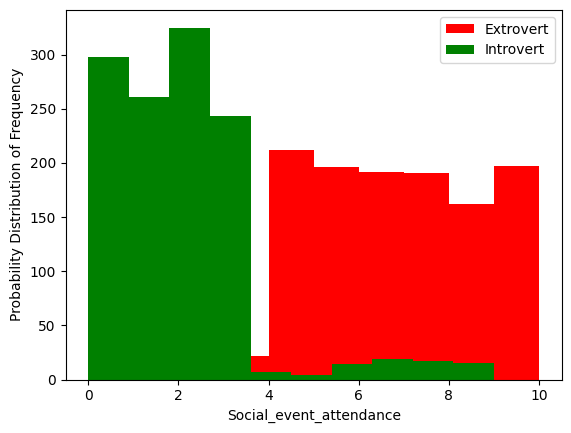

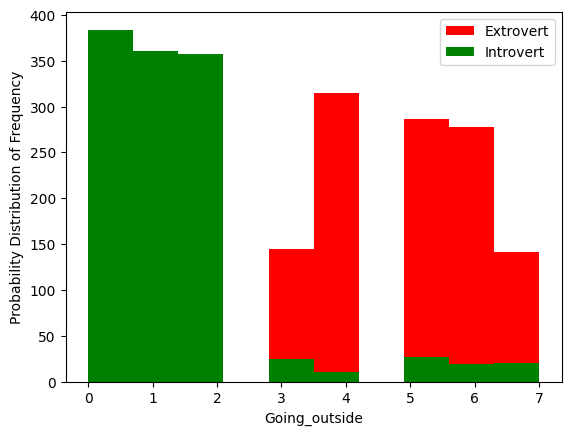

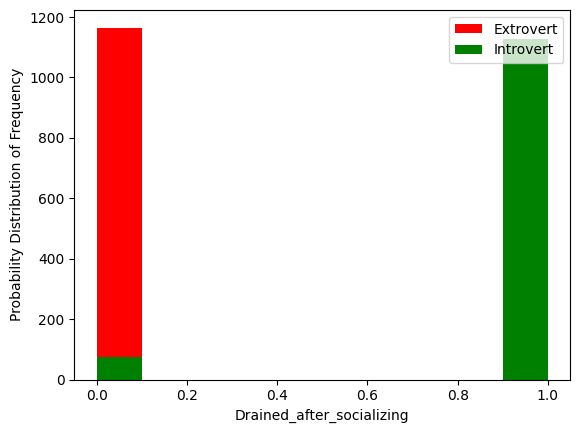

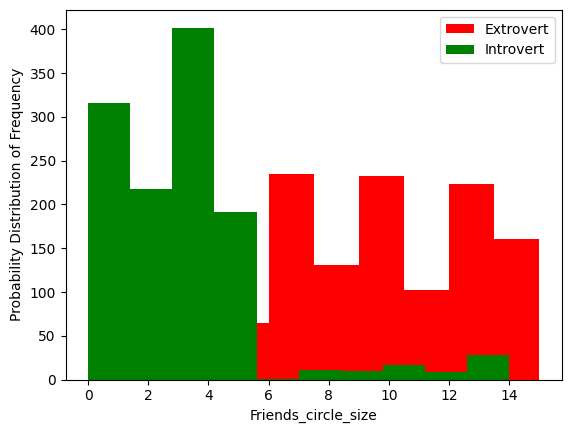

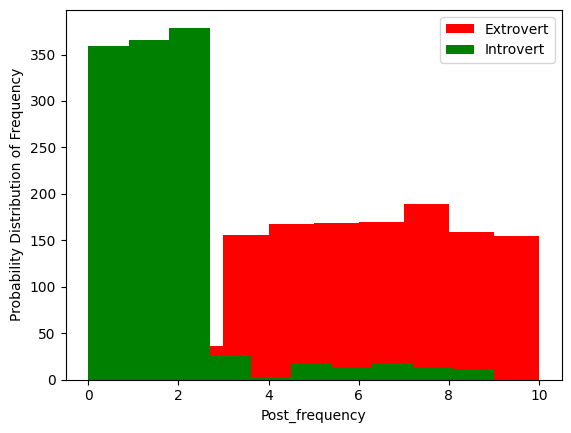

In [16]:
for label in cols[:-1]:
    plt.hist(df[df["Personality"]==1][label],color='r')
    plt.hist(df[df["Personality"]==0][label],color='g')
    plt.xlabel(label)
    plt.ylabel("Probability Distribution of Frequency")
    plt.legend(["Extrovert", "Introvert"], loc="upper right")
    plt.show()

In [17]:
# Model train

In [36]:
X=df[df.columns[:-1]]
Y=df[df.columns[-1]]

In [37]:
X.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0.0,4.0,6.0,0.0,13.0,5.0
1,9.0,1.0,0.0,0.0,1.0,0.0,3.0
2,9.0,1.0,1.0,2.0,1.0,5.0,2.0
3,0.0,0.0,6.0,7.0,0.0,14.0,8.0
4,3.0,0.0,9.0,4.0,0.0,8.0,5.0


In [38]:
Y.head()

,Personality
0,1
1,0
2,0
3,1
4,1


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [47]:
# Logistic regression

In [41]:
# fit, predict

In [48]:
# Object of LogisticRegression Class
lr = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred= lr.predict(X_test)

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9129032258064517
Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92       308
           1       0.94      0.88      0.91       312

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.92      0.91      0.91       620

